In [65]:
# Libraries
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [54]:
# Import preprocessed train/test data
X_train = pd.read_csv('X_train.csv')
X_test = pd.read_csv('X_test.csv')
y_train = pd.read_csv('y_train.csv')
y_test = pd.read_csv('y_test.csv')
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train distribution:\n", y_train.value_counts(normalize=True))


X_train shape: (204277, 25)
X_test shape: (51070, 25)
y_train distribution:
 Default
0          0.883873
1          0.116127
Name: proportion, dtype: float64


In [55]:
rf = RandomForestClassifier(n_estimators=100,random_state=42,class_weight='balanced')

In [56]:
X_train.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,...,MaritalStatus_Single,LoanPurpose_Auto,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other,EmploymentType_Full-time,EmploymentType_Part-time,EmploymentType_Self-employed,EmploymentType_Unemployed
0,45,37039,247916,624,19,2,4.62,60,0.85,0,...,False,True,False,False,False,False,False,False,False,True
1,48,133963,66275,494,119,3,14.72,48,0.49,3,...,False,False,False,False,False,True,False,False,True,False
2,47,100204,6967,718,108,3,5.51,24,0.76,0,...,True,False,True,False,False,False,False,False,True,False
3,42,36078,25966,344,2,3,18.29,36,0.76,1,...,False,False,False,True,False,False,False,False,True,False
4,20,99464,248557,318,74,3,19.45,60,0.45,1,...,False,True,False,False,False,False,False,True,False,False


In [60]:
y_train = y_train.squeeze()
y_test = y_test.squeeze()


In [62]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Base Model
rf = RandomForestClassifier(random_state=42, class_weight='balanced')

# Better but still fast search space
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt']
}

# Randomized Search (still fast)
rand_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=10,        # small but enough
    cv=3,             # stable
    scoring='accuracy',
    n_jobs=-1,
    random_state=42,
    verbose=2
)

# Fit
rand_search.fit(X_train, y_train.values.ravel())

# Best Model
best_rf = rand_search.best_estimator_

print("Best Params:", rand_search.best_params_)

# Test Performance
y_pred = best_rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Params: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 30}
Accuracy: 0.8856667319365576

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.99      0.94     45139
           1       0.57      0.06      0.11      5931

    accuracy                           0.89     51070
   macro avg       0.73      0.53      0.53     51070
weighted avg       0.85      0.89      0.84     51070



<Axes: >

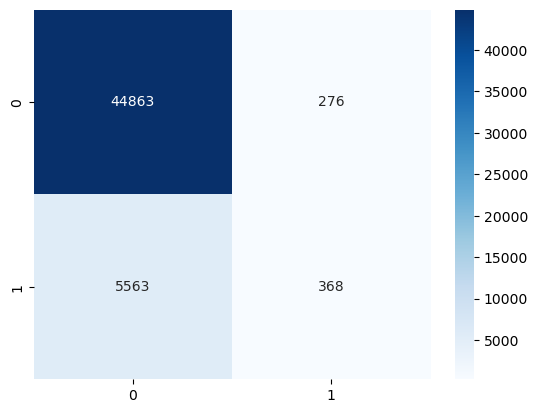

In [63]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')


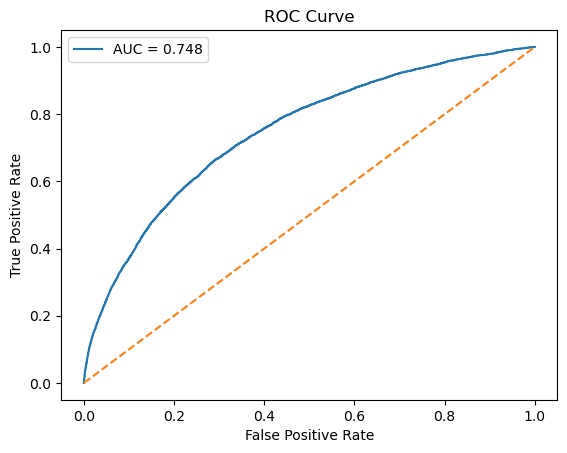

In [64]:
from sklearn.metrics import roc_curve, auc

y_prob = best_rf.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0,1],[0,1],'--')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()


In [50]:
rf_accuracy = accuracy_score(y_test, rf.predict(X_test))
rf_report = classification_report(y_test, rf.predict(X_test), output_dict=True)

rf_precision_1 = rf_report['1']['precision']
rf_recall_1 = rf_report['1']['recall']
rf_f1_1 = rf_report['1']['f1-score']

print(rf_accuracy, rf_precision_1, rf_recall_1, rf_f1_1)


NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.